In [1]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from scipy.stats import skew

C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Defaulter,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Defaulter,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


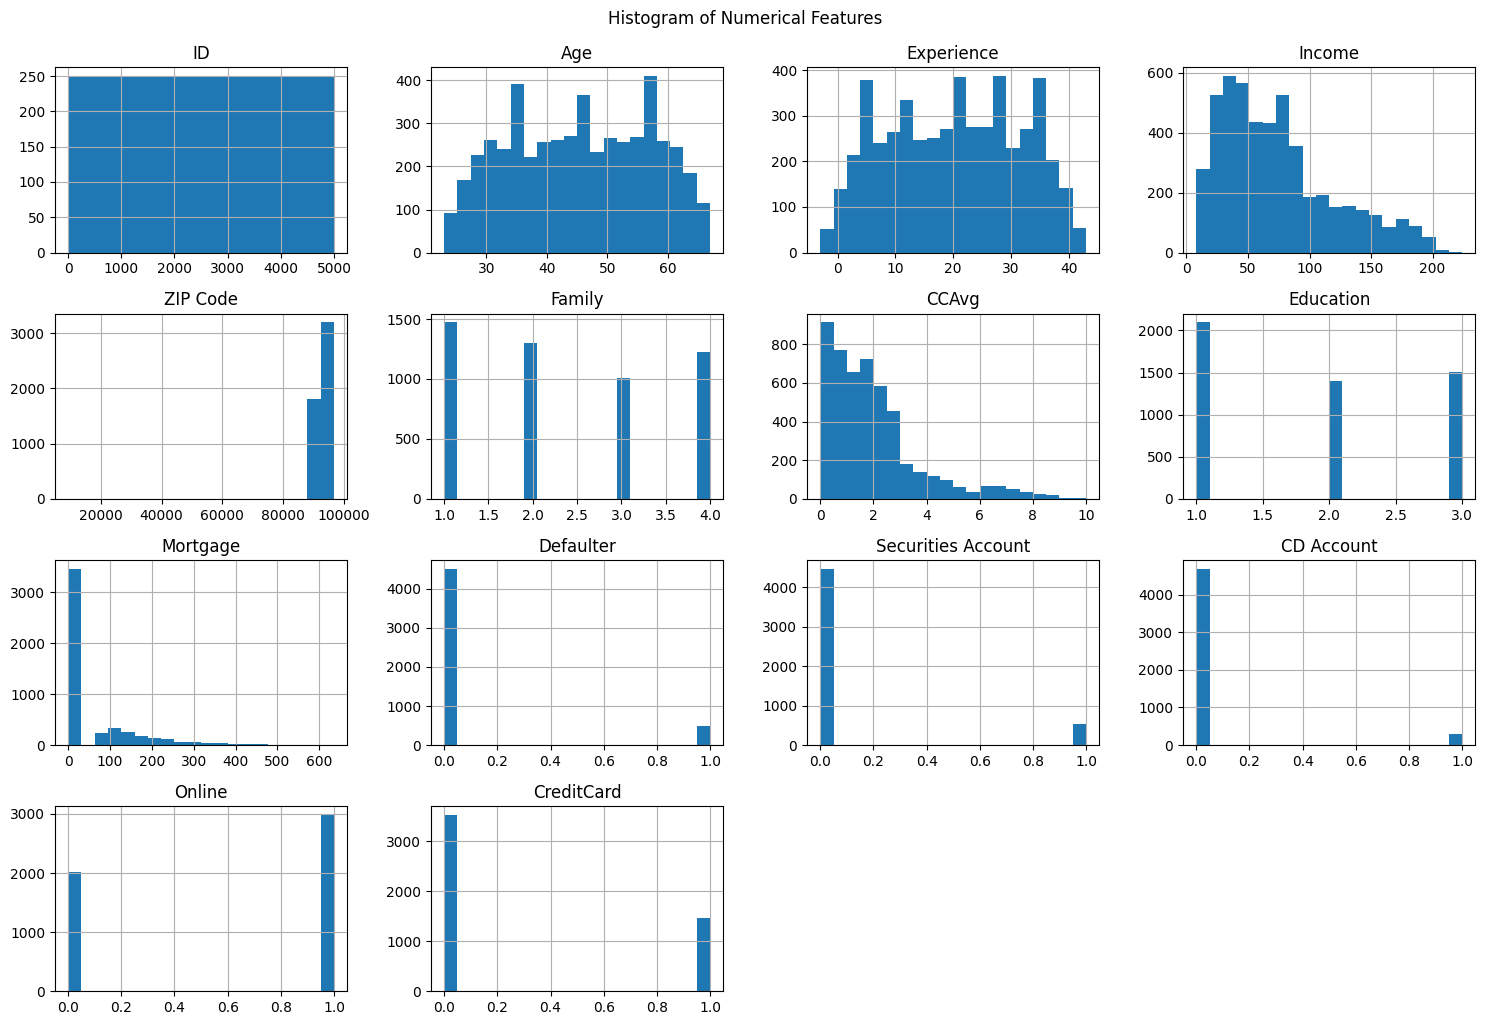

In [6]:

df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.suptitle("Histogram of Numerical Features", y=1.02)
plt.show()

In [7]:
categorical_cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


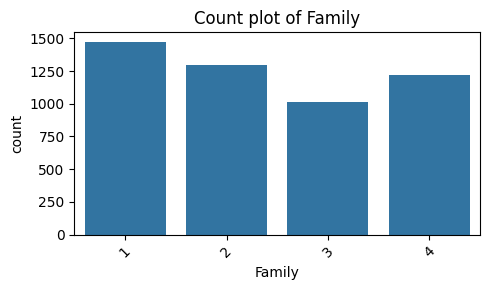

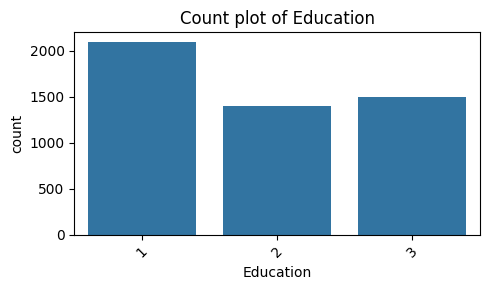

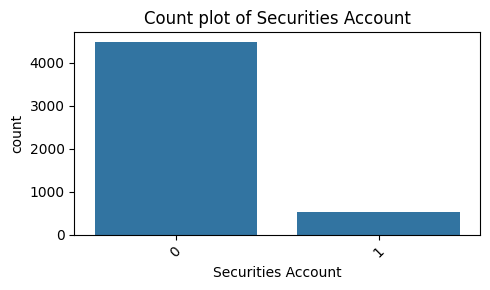

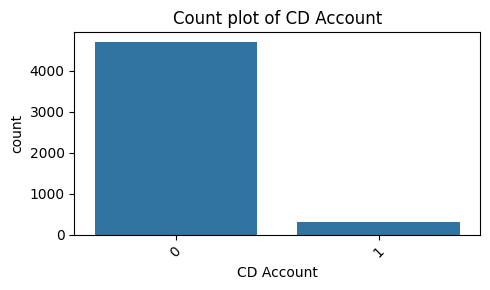

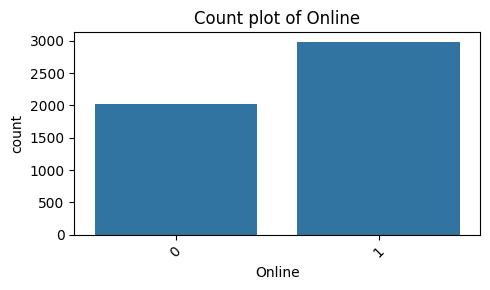

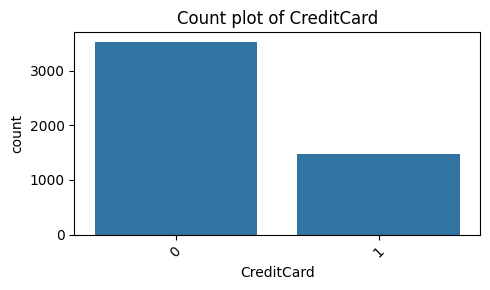

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


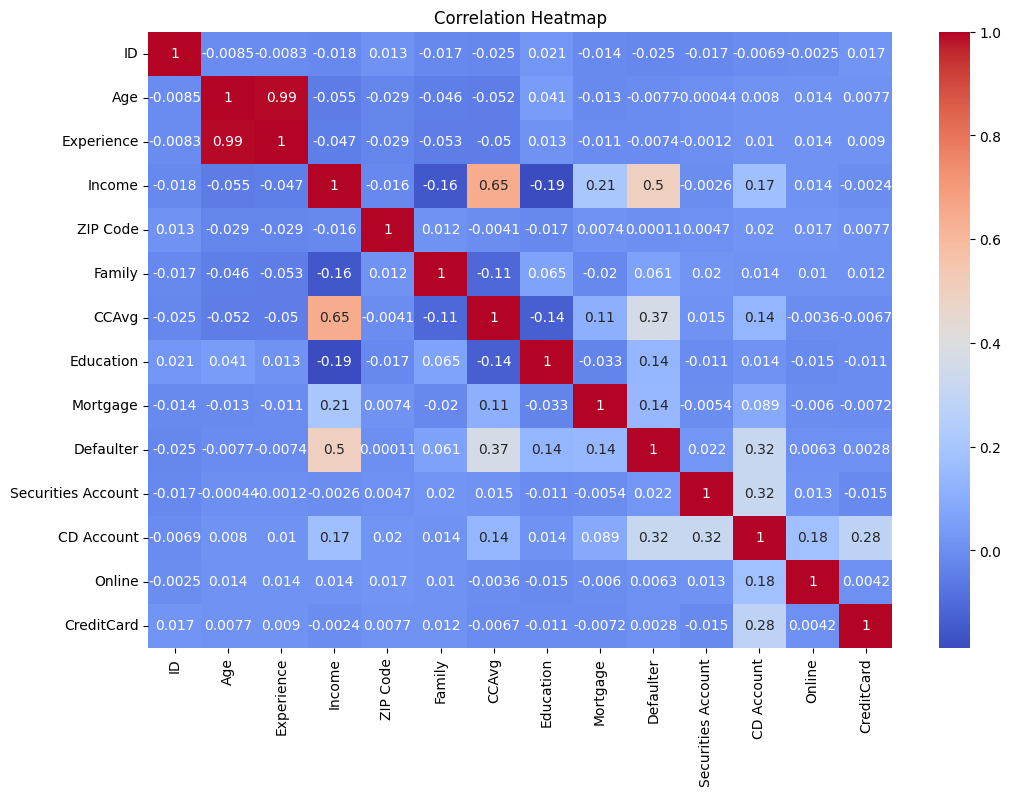

In [9]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

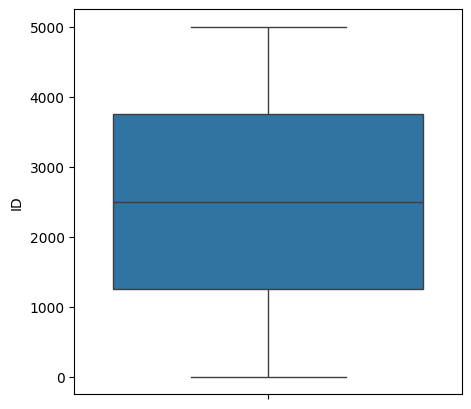

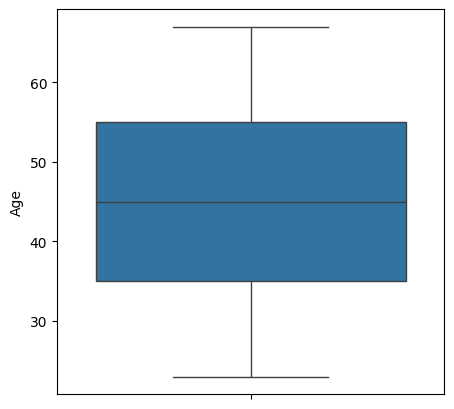

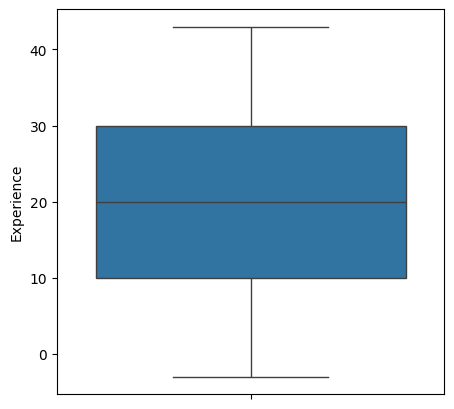

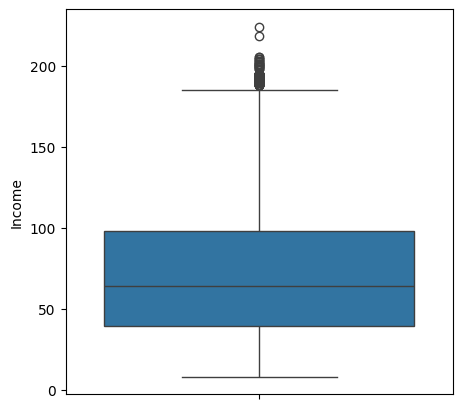

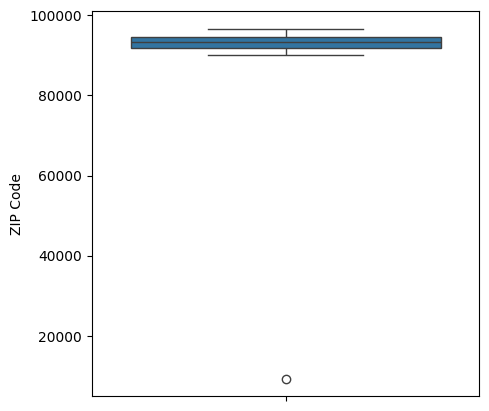

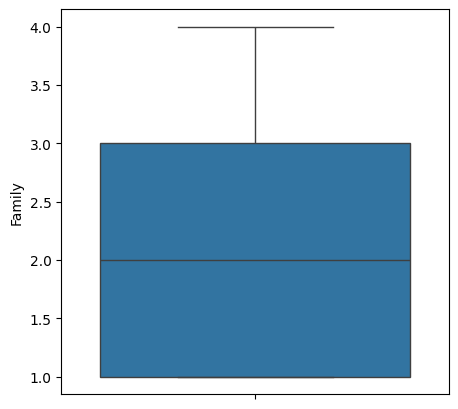

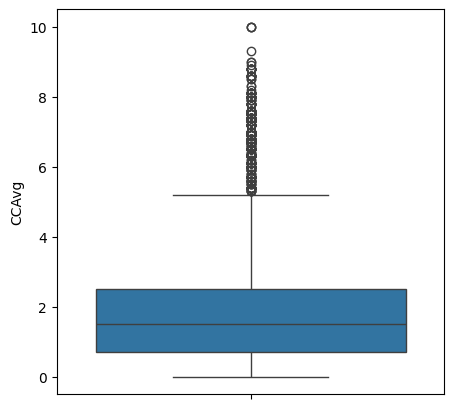

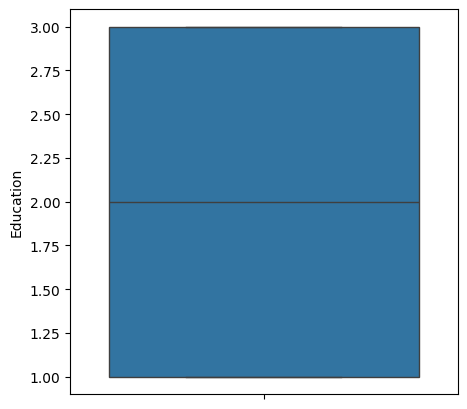

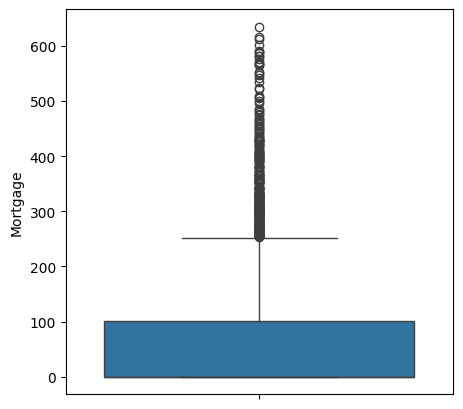

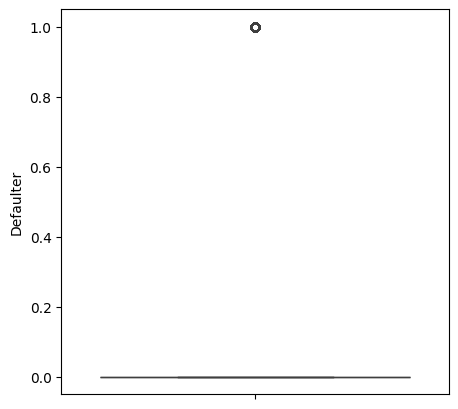

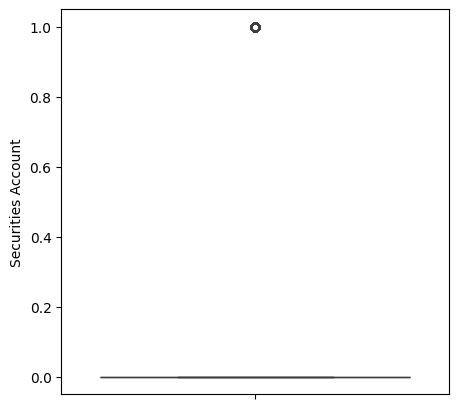

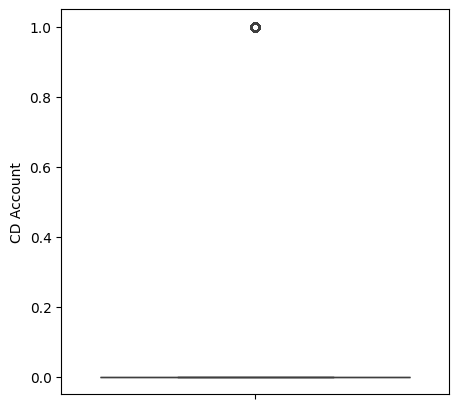

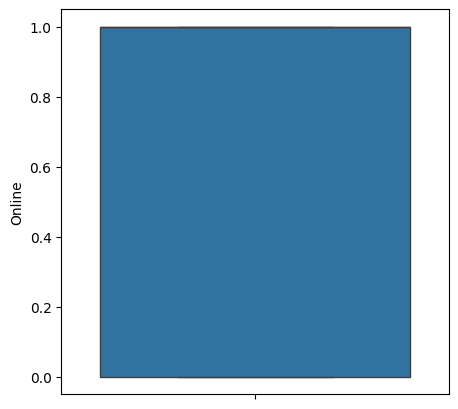

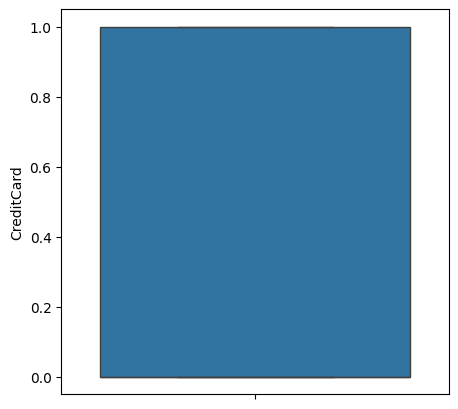

In [10]:
import seaborn as sns
for i in df.columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(df[i])
  plt.show()

In [12]:
import kagglehub
import pandas as pd
import numpy as np
from scipy.stats import skew

from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE


def load_data(dataset_name: str, file_path: str, sheet_name: str = 'Data') -> pd.DataFrame:
    """Download and load the dataset from KaggleHub."""
    path = kagglehub.dataset_download(dataset_name)
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df.drop(['ID', 'ZIP Code'], axis=1)


def split_data(df: pd.DataFrame, target: str, test_size: float = 0.3, val_size: float = 0.2, random_state: int = 42):
    """Split the data into train, validation, and test sets."""
    X = df.drop(columns=[target])
    y = df[target]
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=random_state
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


def preprocess(X_train, X_val, X_test):
    """Apply Yeo-Johnson + RobustScaler to CCAvg and Mortgage; StandardScaler to other continuous features."""
    rb_cols = ['CCAvg', 'Mortgage']
    std_cols = ['Income', 'Experience', 'Age']

    pt = PowerTransformer(method='yeo-johnson')
    rs = RobustScaler()
    ss = StandardScaler()

    # Fit on train
    X_train[rb_cols] = pt.fit_transform(X_train[rb_cols])
    X_train[rb_cols] = rs.fit_transform(X_train[rb_cols])
    X_train[std_cols] = ss.fit_transform(X_train[std_cols])

    # Transform val/test
    for X in (X_val, X_test):
        X[rb_cols] = pt.transform(X[rb_cols])
        X[rb_cols] = rs.transform(X[rb_cols])
        X[std_cols] = ss.transform(X[std_cols])

    return X_train, X_val, X_test


def feature_selection(X_train, y_train, X_val, X_test, n_features: int = 8):
    """Select top features via RFE using LogisticRegression."""
    selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=n_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_val_sel = selector.transform(X_val)
    X_test_sel = selector.transform(X_test)
    return X_train_sel, X_val_sel, X_test_sel


def balance_data(X_train, y_train, random_state: int = 42):
    """Balance the training data using SMOTE."""
    smote = SMOTE(random_state=random_state)
    X_bal, y_bal = smote.fit_resample(X_train, y_train)
    return X_bal, y_bal


def grid_search_models(X_train, y_train):
    """Perform GridSearchCV for specified classifiers."""
    grids = {
        'LogisticRegression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1','l2'], 'solver':['liblinear']}
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth':[3,5,7,None], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'max_depth':[5,10,None]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'learning_rate':[0.01,0.1]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors':[3,5,7]}
        },
        'SVM': {
            'model': SVC(probability=True, random_state=42),
            'params': {'C':[0.1,1,10], 'kernel':['linear','rbf']}
        }
    }
    best_models = {}
    for name, cfg in grids.items():
        gs = GridSearchCV(cfg['model'], cfg['params'], scoring='f1', cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        best_models[name] = gs.best_estimator_
        print(f"Best {name} params: {gs.best_params_}")
    return best_models


def evaluate_model(model, X, y, label: str):
    """Compute and print evaluation metrics."""
    preds = model.predict(X)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, preds))
    print("Precision:", precision_score(y, preds))
    print("Recall   :", recall_score(y, preds))
    print("F1 Score :", f1_score(y, preds))


def main():
    df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, 'Defaulter')
    X_train, X_val, X_test = preprocess(X_train, X_val, X_test)
    X_train_sel, X_val_sel, X_test_sel = feature_selection(X_train, y_train, X_val, X_test)
    X_train_bal, y_train_bal = balance_data(X_train_sel, y_train)

    # Hyperparameter tuning for all models
    best_models = grid_search_models(X_train_bal, y_train_bal)

    # Evaluate each on Validation
    print("\n--- Validation Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_val_sel, y_val, f"{name} (Val)")

    # Evaluate on Test
    print("\n--- Test Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_test_sel, y_test, f"{name} (Test)")


if __name__ == "__main__":
    main()


C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Best LogisticRegression params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best DecisionTree params: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best RandomForest params: {'max_depth': None, 'n_estimators': 100}
Best GradientBoosting params: {'learning_rate': 0.1, 'n_estimators': 100}
Best KNN params: {'n_neighbors': 3}
Best SVM params: {'C': 10, 'kernel': 'rbf'}

--- Validation Metrics ---

=== LogisticRegression (Val) ===
Accuracy : 0.8842857142857142
Precision: 0.4461538461538462
Recall   : 0.8656716417910447
F1 Score : 0.5888324873096447

=== DecisionTree (Val) ===
Accuracy : 0.9657142857142857
Precision: 0.8115942028985508
Recall   : 0.835820895522388
F1 Score : 0.8235294117647058

=== RandomForest (Val) ===
Accuracy : 0.9828571428571429
Precision: 0.9824561403508771
Recall   : 0.835820895522388
F1 Score : 0.9032258064516129

=== GradientBoosting (Val) ===
Accuracy : 0.98
Precision: 0.9344262295081968
Recall   : 0.8507462686567164
F1 Score : 0.890625

=

**Mlflow added code**

In [4]:
import kagglehub
import pandas as pd
import numpy as np
from scipy.stats import skew

from sklearn.preprocessing import PowerTransformer, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE


def load_data(dataset_name: str, file_path: str, sheet_name: str = 'Data') -> pd.DataFrame:
    """Download and load the dataset from KaggleHub."""
    path = kagglehub.dataset_download(dataset_name)
    xls = pd.ExcelFile(file_path)
    df = pd.read_excel(xls, sheet_name=sheet_name)
    return df.drop(['ID', 'ZIP Code'], axis=1)


def split_data(df: pd.DataFrame, target: str, test_size: float = 0.3, val_size: float = 0.2, random_state: int = 42):
    """Split the data into train, validation, and test sets."""
    X = df.drop(columns=[target])
    y = df[target]
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size, stratify=y_temp, random_state=random_state
    )
    return X_train, X_val, X_test, y_train, y_val, y_test


def preprocess(X_train, X_val, X_test):
    """Apply Yeo-Johnson + RobustScaler to CCAvg and Mortgage; StandardScaler to other continuous features."""
    rb_cols = ['CCAvg', 'Mortgage']
    std_cols = ['Income', 'Experience', 'Age']

    pt = PowerTransformer(method='yeo-johnson')
    rs = RobustScaler()
    ss = StandardScaler()

    # Fit on train
    X_train[rb_cols] = pt.fit_transform(X_train[rb_cols])
    X_train[rb_cols] = rs.fit_transform(X_train[rb_cols])
    X_train[std_cols] = ss.fit_transform(X_train[std_cols])

    # Transform val/test
    for X in (X_val, X_test):
        X[rb_cols] = pt.transform(X[rb_cols])
        X[rb_cols] = rs.transform(X[rb_cols])
        X[std_cols] = ss.transform(X[std_cols])

    return X_train, X_val, X_test


def feature_selection(X_train, y_train, X_val, X_test, n_features: int = 8):
    """Select top features via RFE using LogisticRegression."""
    selector = RFE(LogisticRegression(max_iter=1000), n_features_to_select=n_features)
    X_train_sel = selector.fit_transform(X_train, y_train)
    X_val_sel = selector.transform(X_val)
    X_test_sel = selector.transform(X_test)
    return X_train_sel, X_val_sel, X_test_sel


def balance_data(X_train, y_train, random_state: int = 42):
    """Balance the training data using SMOTE."""
    smote = SMOTE(random_state=random_state)
    X_bal, y_bal = smote.fit_resample(X_train, y_train)
    return X_bal, y_bal


def grid_search_models(X_train, y_train):
    """Perform GridSearchCV for specified classifiers."""
    grids = {
        'LogisticRegression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1','l2'], 'solver':['liblinear']}
        },
        'DecisionTree': {
            'model': DecisionTreeClassifier(),
            'params': {'max_depth':[3,5,7,None], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,2,4]}
        },
        'RandomForest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'max_depth':[5,10,None]}
        },
        'GradientBoosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {'n_estimators':[50,100], 'learning_rate':[0.01,0.1]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors':[3,5,7]}
        },
        'SVM': {
            'model': SVC(probability=True, random_state=42),
            'params': {'C':[0.1,1,10], 'kernel':['linear','rbf']}
        }
    }
    best_models = {}
    for name, cfg in grids.items():
        gs = GridSearchCV(cfg['model'], cfg['params'], scoring='f1', cv=5, n_jobs=-1)
        gs.fit(X_train, y_train)
        best_models[name] = gs.best_estimator_
        print(f"Best {name} params: {gs.best_params_}")
    return best_models


def evaluate_model(model, X, y, label: str):
    """Compute and print evaluation metrics."""
    preds = model.predict(X)
    print(f"\n=== {label} ===")
    print("Accuracy :", accuracy_score(y, preds))
    print("Precision:", precision_score(y, preds))
    print("Recall   :", recall_score(y, preds))
    print("F1 Score :", f1_score(y, preds))


def main():
    df = pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name="Data")
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(df, 'Defaulter')
    X_train, X_val, X_test = preprocess(X_train, X_val, X_test)
    X_train_sel, X_val_sel, X_test_sel = feature_selection(X_train, y_train, X_val, X_test)
    X_train_bal, y_train_bal = balance_data(X_train_sel, y_train)

    # Hyperparameter tuning for all models
    best_models = grid_search_models(X_train_bal, y_train_bal)

    # Evaluate each on Validation
    print("\n--- Validation Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_val_sel, y_val, f"{name} (Val)")

    # Evaluate on Test
    print("\n--- Test Metrics ---")
    for name, model in best_models.items():
        evaluate_model(model, X_test_sel, y_test, f"{name} (Test)")


if __name__ == "__main__":
    main()



# === MLflow Setup ===
mlflow.set_tracking_uri("file:///absolute/path/to/mlruns")
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("Bank Loan ML Experiment")


def evaluate_and_log_model(name, model, X_train, y_train, X_test, y_test):
    with mlflow.start_run(run_name=name):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        mlflow.log_params(model.get_params())
        mlflow.log_metrics({
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1_score": f1
        })
        mlflow.sklearn.log_model(model, artifact_path=f"{name}_model")

        print(f"{name} -> Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")

# === Train and Log Models ===
for name, model in models.items():
    evaluate_and_log_model(name, model, X_train_sel, y_train, X_test_sel, y_test)

C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Minfy\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOT

Best LogisticRegression params: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best DecisionTree params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best RandomForest params: {'max_depth': None, 'n_estimators': 100}
Best GradientBoosting params: {'learning_rate': 0.1, 'n_estimators': 100}
Best KNN params: {'n_neighbors': 3}
Best SVM params: {'C': 10, 'kernel': 'rbf'}

--- Validation Metrics ---

=== LogisticRegression (Val) ===
Accuracy : 0.8842857142857142
Precision: 0.4461538461538462
Recall   : 0.8656716417910447
F1 Score : 0.5888324873096447

=== DecisionTree (Val) ===
Accuracy : 0.9685714285714285
Precision: 0.8813559322033898
Recall   : 0.7761194029850746
F1 Score : 0.8253968253968254

=== RandomForest (Val) ===
Accuracy : 0.9828571428571429
Precision: 0.9824561403508771
Recall   : 0.835820895522388
F1 Score : 0.9032258064516129

=== GradientBoosting (Val) ===
Accuracy : 0.98
Precision: 0.9344262295081968
Recall   : 0.8507462686567164
F1 Score : 0.89062

2025/07/01 15:40:33 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:40:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression -> Accuracy: 0.907, Precision: 0.508, Recall: 0.875, F1: 0.643
🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/960628512990043069/runs/868da2f3365746479741fbc4e8a5f16d
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:40:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:40:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree -> Accuracy: 0.981, Precision: 0.882, Recall: 0.931, F1: 0.905
🏃 View run DecisionTree at: http://localhost:5000/#/experiments/960628512990043069/runs/af6a0068289c438ab7e4926d78447fe2
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:40:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:40:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest -> Accuracy: 0.985, Precision: 0.907, Recall: 0.944, F1: 0.925
🏃 View run RandomForest at: http://localhost:5000/#/experiments/960628512990043069/runs/bb83ac11bb144aef9b04db89d9d8a9c3
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:40:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:41:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting -> Accuracy: 0.981, Precision: 0.863, Recall: 0.958, F1: 0.908
🏃 View run GradientBoosting at: http://localhost:5000/#/experiments/960628512990043069/runs/3c9b17ee303543d48447c3cf5cad7b56
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:41:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNN -> Accuracy: 0.949, Precision: 0.685, Recall: 0.875, F1: 0.768
🏃 View run KNN at: http://localhost:5000/#/experiments/960628512990043069/runs/86e4bc7a1bb942a6bbb95c45b9dc8657
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:41:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM -> Accuracy: 0.963, Precision: 0.739, Recall: 0.944, F1: 0.829
🏃 View run SVM at: http://localhost:5000/#/experiments/960628512990043069/runs/b4967c3089a043828bb32d51ad5aa55d
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


In [6]:
from mlflow.tracking import MlflowClient

# Store the best model info
best_model_name = None
best_model = None
best_accuracy = 0.0
best_run_id = None

for name, model in models.items():
    with mlflow.start_run(run_name=f"{name}_register", nested=True) as run:
        model.fit(X_train_sel, y_train)
        y_pred = model.predict(X_test_sel)

        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        mlflow.log_params(model.get_params())
        mlflow.log_metrics({
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1_score": f1
        })

        mlflow.sklearn.log_model(model, "model")

        print(f"{name} -> Accuracy: {acc:.4f}")

        if acc > best_accuracy:
            best_accuracy = acc
            best_model_name = name
            best_model = model
            best_run_id = run.info.run_id

# === Register the Best Model ===
if best_model_name and best_run_id:
    model_uri = f"runs:/{best_run_id}/model"
    model_registry_name = f"BankLoanBestModel_{best_model_name}"

    client = MlflowClient()
    client.create_registered_model(model_registry_name)
    client.create_model_version(name=model_registry_name, source=model_uri, run_id=best_run_id)

    print(f"\n✅ Registered best model: {model_registry_name} (Accuracy: {best_accuracy:.4f})")
else:
    print("❌ No model was registered.")

2025/07/01 15:53:08 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression -> Accuracy: 0.9067
🏃 View run LogisticRegression_register at: http://localhost:5000/#/experiments/960628512990043069/runs/529b94df21474d468a041b689a04e9ad
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:14 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:20 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree -> Accuracy: 0.9800
🏃 View run DecisionTree_register at: http://localhost:5000/#/experiments/960628512990043069/runs/a1f6b2187871471d9739a5378ac79a8d
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest -> Accuracy: 0.9880
🏃 View run RandomForest_register at: http://localhost:5000/#/experiments/960628512990043069/runs/06190d698d984ed9ad88d35ab83b4de5
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting -> Accuracy: 0.9813
🏃 View run GradientBoosting_register at: http://localhost:5000/#/experiments/960628512990043069/runs/039c32d5fe9446dc88dee2abd7c62993
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


KNN -> Accuracy: 0.9493
🏃 View run KNN_register at: http://localhost:5000/#/experiments/960628512990043069/runs/6b92b55cd1ab484da1cf6f292a5f7c79
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:48 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/07/01 15:53:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM -> Accuracy: 0.9627
🏃 View run SVM_register at: http://localhost:5000/#/experiments/960628512990043069/runs/7f41f39d250c47258cf8529a4b81bd7f
🧪 View experiment at: http://localhost:5000/#/experiments/960628512990043069


2025/07/01 15:53:55 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BankLoanBestModel_RandomForest, version 1



✅ Registered best model: BankLoanBestModel_RandomForest (Accuracy: 0.9880)


In [7]:
from mlflow.tracking import MlflowClient
import mlflow.sklearn

# === Register and Stage Best Model ===
if best_model_name and best_run_id:
    model_uri = f"runs:/{best_run_id}/model"
    model_registry_name = f"BankLoanBestModel_{best_model_name}"

    client = MlflowClient()

    # Create model in registry if not exists
    try:
        client.get_registered_model(model_registry_name)
    except:
        client.create_registered_model(model_registry_name)

    # Register new version
    mv = client.create_model_version(
        name=model_registry_name,
        source=model_uri,
        run_id=best_run_id
    )

    # Transition the model to STAGING (or PRODUCTION)
    client.transition_model_version_stage(
        name=model_registry_name,
        version=mv.version,
        stage="Staging",  # Or use "Production"
        archive_existing_versions=True
    )

    print(f"\n✅ Model version {mv.version} for {model_registry_name} is now in 'Staging'")

    # === Deploy: Load and use the model ===
    staged_model = mlflow.sklearn.load_model(f"models:/{model_registry_name}/Staging")
    
    # Example inference
    preds = staged_model.predict(X_test_sel)
    print("\n🔍 Inference on Test Data (First 10 Predictions):", preds[:10])
else:
    print("❌ No best model found for staging.")


2025/07/01 16:14:04 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: BankLoanBestModel_RandomForest, version 2
C:\Users\Minfy\AppData\Local\Temp\ipykernel_18392\3120622320.py:25: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(



✅ Model version 2 for BankLoanBestModel_RandomForest is now in 'Staging'



🔍 Inference on Test Data (First 10 Predictions): [0 0 0 0 0 0 0 0 0 0]
